In [1]:
pip install langdetect


The following command must be run outside of the IPython shell:

    $ pip install langdetect

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more informations on how to install packages:

    https://docs.python.org/3/installing/


In [136]:
#important libraries
import pandas as pd
import numpy as np
import nltk
import re
import string
#importing stopwords is optional, in this case it decreased accuracy
import itertools
import time
from tqdm import tqdm
from langdetect import detect
from nltk.corpus import stopwords

#python imports
import re
import json
import os
from collections import Counter

#For visualization
from matplotlib import pyplot as plt
from matplotlib import ticker
import seaborn as sns
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from wordcloud import WordCloud,STOPWORDS
from tqdm import tqdm_notebook

In [3]:
start_time = time.time()

In [4]:
data = pd.read_csv('text_emotion.csv')

In [5]:
data.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


In [6]:
from nltk.stem.wordnet import WordNetLemmatizer 
lem = WordNetLemmatizer()

In [7]:
data['content'] = data['content'].apply(lambda x: re.sub(r"https\S+", "", str(x)))
data['content'] = data['content'].apply(lambda x: x.replace("'", ""))
data['content'] = data['content'].apply(lambda x: x.translate(str.maketrans(string.punctuation, " "*len(string.punctuation))))
data['content'] = data['content'].apply(lambda x: x.lower())
data['content'] = data['content'].apply(lambda x: nltk.tokenize.word_tokenize(x))
data['content'] = data['content'].apply(lambda x: " ".join([lem.lemmatize(word, "v") for word in x]))
data['content'] = data['content'].apply(lambda x: x.strip())
data['content'].replace('', np.nan, inplace=True)
data.dropna(subset=['content'], inplace=True)

In [8]:
data['content'].head()

0    tiffanylue i know i be listenin to bad habit e...
1    layin n bed with a headache ughhhh waitin on y...
2                       funeral ceremony gloomy friday
3                   want to hang out with friends soon
4    dannycastillo we want to trade with someone wh...
Name: content, dtype: object

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(data.content, data.sentiment, test_size=0.25, random_state=0)
x_train = x_train.reset_index(drop = True)
x_test = x_test.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

In [41]:
vectorizer = TfidfVectorizer(min_df=3, max_df=0.9)

train_vectors = vectorizer.fit_transform(x_train)
test_vectors = vectorizer.transform(x_test)

model = svm.SVC(kernel='linear') 
model.fit(train_vectors, y_train) 
predicted_sentiment = model.predict(test_vectors)

In [42]:
test_content = "Lost my job"
test_content = [test_content]
test_vector = vectorizer.transform(test_content)
predicted =  model.predict(test_vector)
print(predicted)

['worry']


In [43]:
df = pd.read_csv('covid19_tweet_30thapril.CSV')

In [44]:
df.head()

,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,...,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang
0,1255648057644867584,860252856829587457,2020-04-30T00:00:00Z,IMSS_SanLuis,"Asegura sus beneficios, registra a tu esposa e...",TweetDeck,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,1145,41,NaN,2017-05-04T22:00:38Z,False,es
1,1255648058483724288,42705538,2020-04-30T00:00:00Z,_ElFaro_,"#COVID19 | El Faro conversó con policías, un f...",TweetDeck,NaN,NaN,NaN,False,...,11,NaN,NaN,NaN,513235,643,NaN,2009-05-26T20:01:23Z,True,es
2,1255648056764071940,154836286,2020-04-30T00:00:00Z,Cambio16,"Si ya era cuestionable la burocracia, lo es má...",TweetDeck,NaN,NaN,NaN,False,...,1,NaN,NaN,NaN,17506,1874,NaN,2010-06-12T09:48:50Z,False,es
3,1255648056717897728,36100710,2020-04-30T00:00:00Z,GobCDMX,Las medidas de higiene ayudan a reducir la pro...,Twitter Media Studio,NaN,NaN,NaN,False,...,38,NaN,NaN,NaN,2779321,215,NaN,2009-04-28T15:55:16Z,True,es
4,1255648058295169025,849376242637864960,2020-04-30T00:00:00Z,IMSSZac,Cubre tu nariz y boca al estornudar con el áng...,TweetDeck,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,962,208,NaN,2017-04-04T21:40:51Z,False,es


In [45]:
df['text'] = df['text'].apply(lambda x: re.sub(r"https\S+", "", str(x)))
df['text'] = df['text'].apply(lambda x: x.replace("'", ""))
df['text'] = df['text'].apply(lambda x: x.translate(str.maketrans(string.punctuation, " "*len(string.punctuation))))
df['text'] = df['text'].apply(lambda x: re.sub(' +', ' ', x ))
df['text'] = df['text'].apply(lambda x: x.lower())

In [46]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stop_words.update(['#coronavirus', '#coronavirusoutbreak', '#coronavirusPandemic', '#covid19', '#covid_19', '#epitwitter', '#ihavecorona', 'amp', 'coronavirus', 'covid19','covid','19'])
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

[nltk_data] Downloading package stopwords to /home/rohan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
new_words = []
count = 0
for i in tqdm((range(len(df)))):
    try:
        if(detect(df.text[i]) == "en"):
            new_words.append(df.text[i])
    except:
        count+=1

100%|██████████| 355387/355387 [49:14<00:00, 120.30it/s] 


In [48]:
final_data =  vectorizer.transform(new_words)
final_predicted =  model.predict(final_data)
print(final_predicted)

['worry' 'neutral' 'neutral' ... 'neutral' 'happiness' 'worry']


In [49]:
prediction_df = pd.DataFrame({'Content':new_words, 'Emotion_predicted':final_predicted})
prediction_df.to_csv('emotion_recognizer_svm_covid19_april30.csv', index = False)

In [50]:
elapsed_time = time.time() - start_time
print ("processing time:", elapsed_time, "seconds")

processing time: 21863.48839712143 seconds


In [51]:
new_list = [word for line in new_words for word in line.split() if not word.isdigit()]

/home/rohan/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


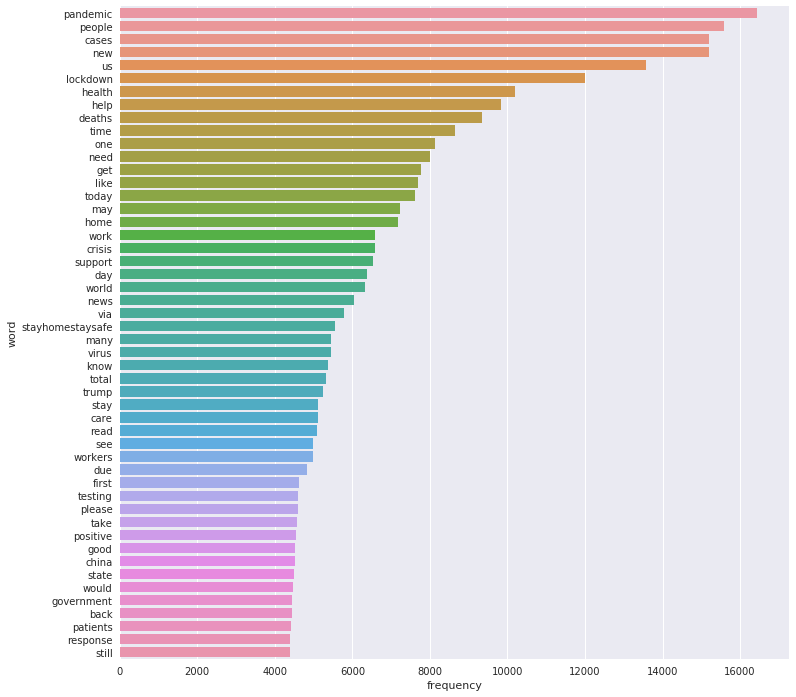

In [52]:
sns.set(style="darkgrid")
counts = Counter(new_list).most_common(50)
counts_df = pd.DataFrame(counts)
counts_df
counts_df.columns = ['word', 'frequency']

fig, ax = plt.subplots(figsize = (12, 12))
ax = sns.barplot(y="word", x='frequency', ax = ax, data=counts_df)
plt.savefig('wordcount_bar.png')
plt.show()

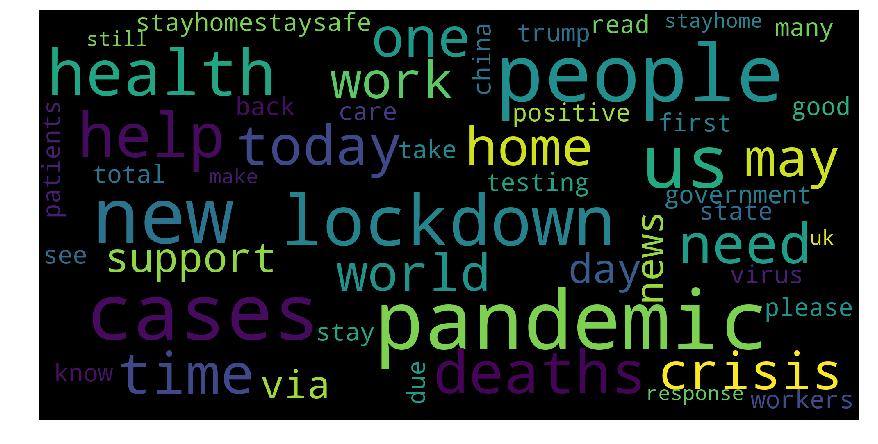

In [153]:
stopwords=set(STOPWORDS)
wordcloud = WordCloud(
    background_color='black',
    stopwords=stopwords,
    max_words=50,
    max_font_size=40, 
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(new_list))


plt.figure(figsize = (12, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('wordcloud.png')
plt.show()

     Emotion   Count
0      worry   33807
1    neutral  143803
2   surprise     380
3  happiness   12749
4    sadness    2779
5       hate     455
6        fun     213
7       love    2325
8     relief     263


/home/rohan/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


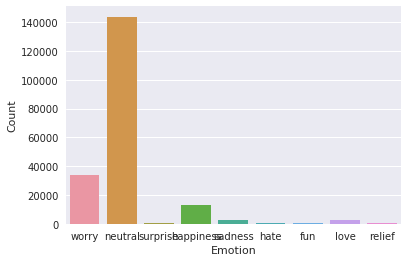

In [154]:
emotion_counts = pd.DataFrame.from_dict(Counter(prediction_df['Emotion_predicted']), orient = 'index').reset_index()
emotion_counts.columns = ['Emotion', 'Count']
emotion_counts = emotion_counts[emotion_counts.Emotion != 'empty']
print(emotion_counts)
sns.barplot(y="Count", x='Emotion', data=emotion_counts)
plt.savefig('Emotion.png')
plt.show()

In [155]:
worry = prediction_df[prediction_df['Emotion_predicted'] == 'worry']['Content']
neutral = prediction_df[prediction_df['Emotion_predicted'] == 'neutral']['Content']
surprise = prediction_df[prediction_df['Emotion_predicted'] == 'surprise']['Content']
happiness = prediction_df[prediction_df['Emotion_predicted'] == 'happiness']['Content']
sadness = prediction_df[prediction_df['Emotion_predicted'] == 'sadness']['Content']
hate = prediction_df[prediction_df['Emotion_predicted'] == 'hate']['Content']
fun = prediction_df[prediction_df['Emotion_predicted'] == 'fun']['Content']
love = prediction_df[prediction_df['Emotion_predicted'] == 'love']['Content']
relief = prediction_df[prediction_df['Emotion_predicted'] == 'relief']['Content']


worry_list = [word for line in worry for word in line.split()]
neutral_list = [word for line in neutral for word in line.split()]
surprise_list = [word for line in surprise for word in line.split()]
happiness_list = [word for line in happiness for word in line.split()]
sadness_list = [word for line in sadness for word in line.split()]
hate_list = [word for line in hate for word in line.split()]
fun_list = [word for line in fun for word in line.split()]
love_list = [word for line in love for word in line.split()]
relief_list = [word for line in relief for word in line.split()]

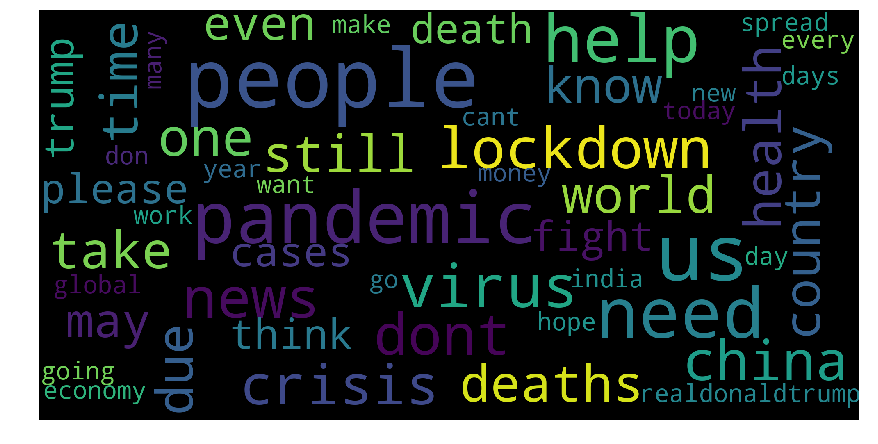

In [156]:
worry_cloud = WordCloud(
    background_color='black',
    stopwords=stopwords,
    max_words=50,
    max_font_size=40, 
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(worry_list))

plt.figure(figsize = (12, 10), facecolor = None)
plt.imshow(worry_cloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('worry_wordcloud.png')
plt.show()

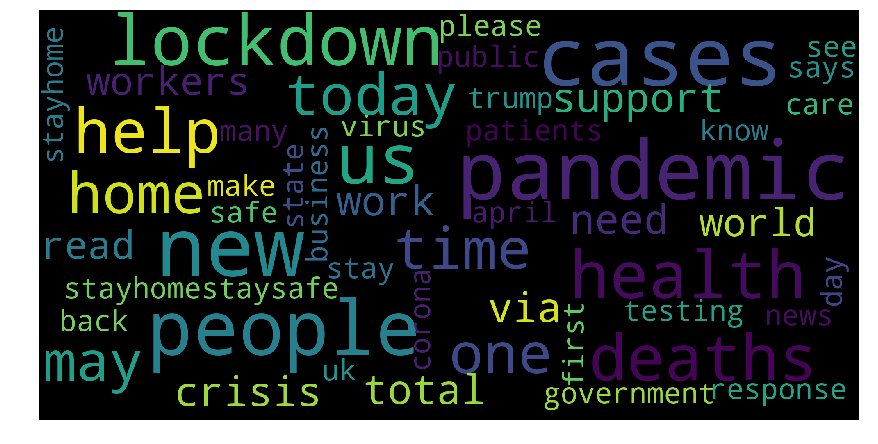

In [157]:
neutral_cloud = WordCloud(
    background_color='black',
    stopwords=stopwords,
    max_words=50,
    max_font_size=40, 
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(neutral_list))
plt.figure(figsize = (12, 10), facecolor = None)
plt.imshow(neutral_cloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('neutral_wordcloud.png')
plt.show()

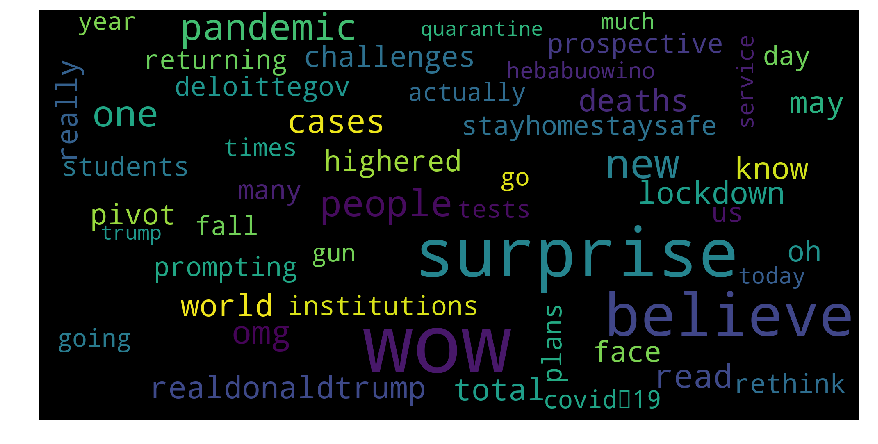

In [158]:
surprise_cloud = WordCloud(
    background_color='black',
    stopwords=stopwords,
    max_words=50,
    max_font_size=40, 
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(surprise_list))
plt.figure(figsize = (12, 10), facecolor = None)
plt.imshow(surprise_cloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('surprise_wordcloud.png')
plt.show()

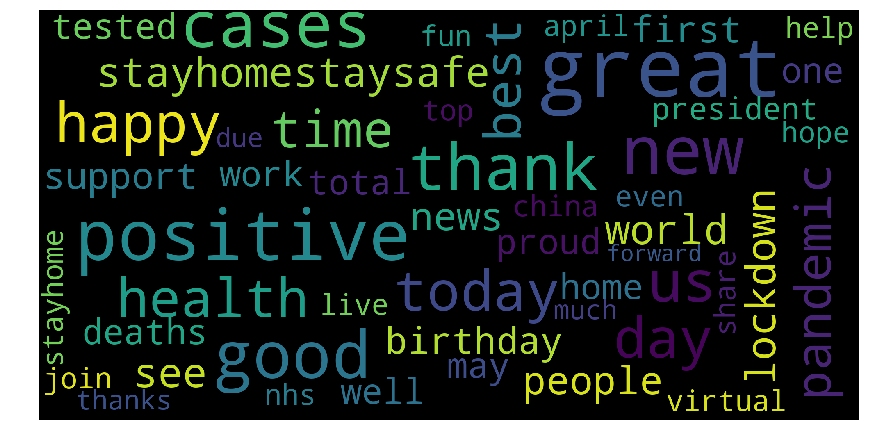

In [159]:
happiness_cloud = WordCloud(
    background_color='black',
    stopwords=stopwords,
    max_words=50,
    max_font_size=40, 
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(happiness_list))
plt.figure(figsize = (12, 10), facecolor = None)
plt.imshow(happiness_cloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('happiness_wordcloud.png')
plt.show()

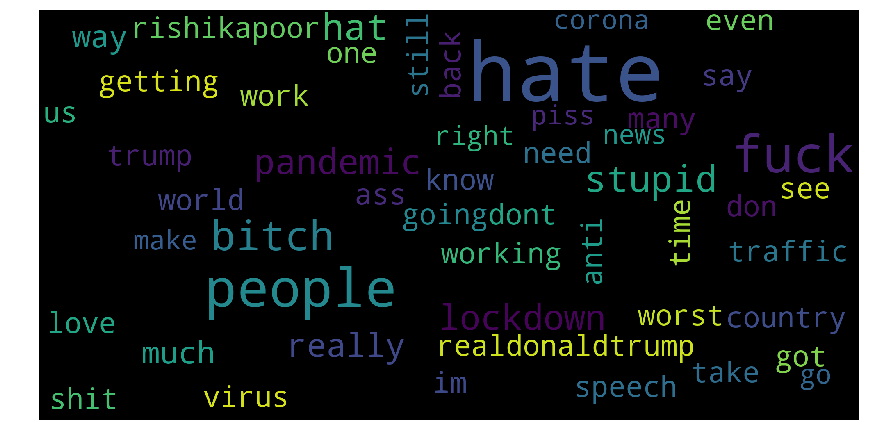

In [160]:
hate_cloud = WordCloud(
    background_color='black',
    stopwords=stopwords,
    max_words=50,
    max_font_size=40, 
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(hate_list))
plt.figure(figsize = (12, 10), facecolor = None)
plt.imshow(hate_cloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('hate_wordcloud.png')
plt.show()

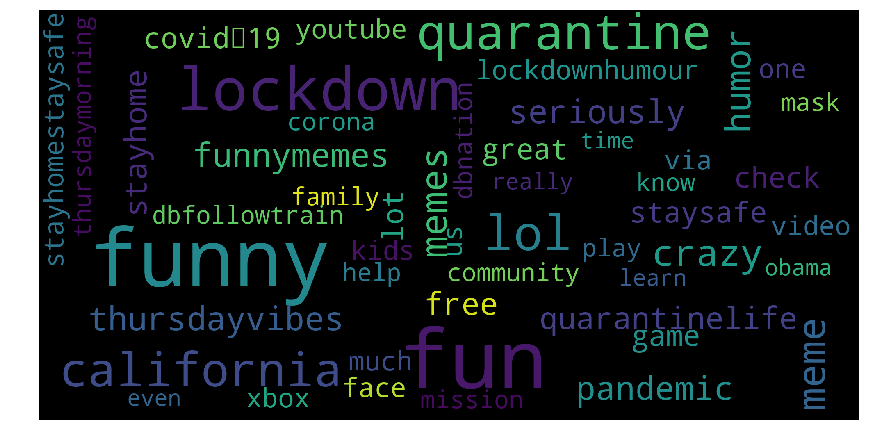

In [161]:
fun_cloud = WordCloud(
    background_color='black',
    stopwords=stopwords,
    max_words=50,
    max_font_size=40, 
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(fun_list))
plt.figure(figsize = (12, 10), facecolor = None)
plt.imshow(fun_cloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('fun_wordcloud.png')
plt.show()

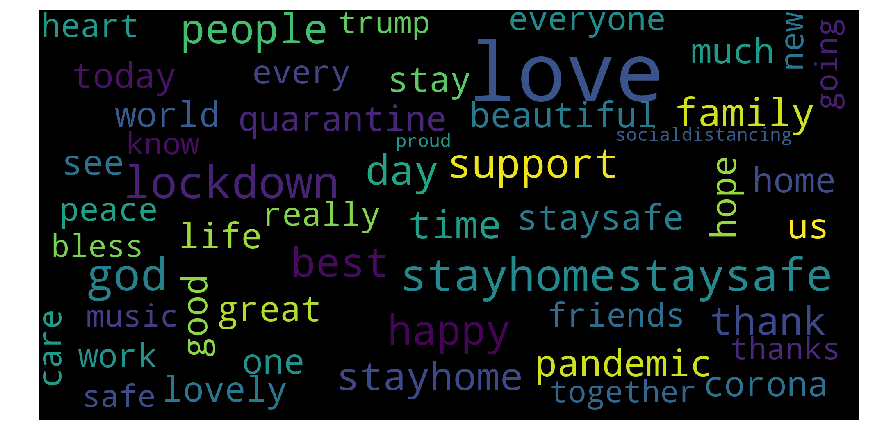

In [162]:
love_cloud = WordCloud(
    background_color='black',
    stopwords=stopwords,
    max_words=50,
    max_font_size=40, 
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(love_list))
plt.figure(figsize = (12, 10), facecolor = None)
plt.imshow(love_cloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('love_wordcloud.png')
plt.show()

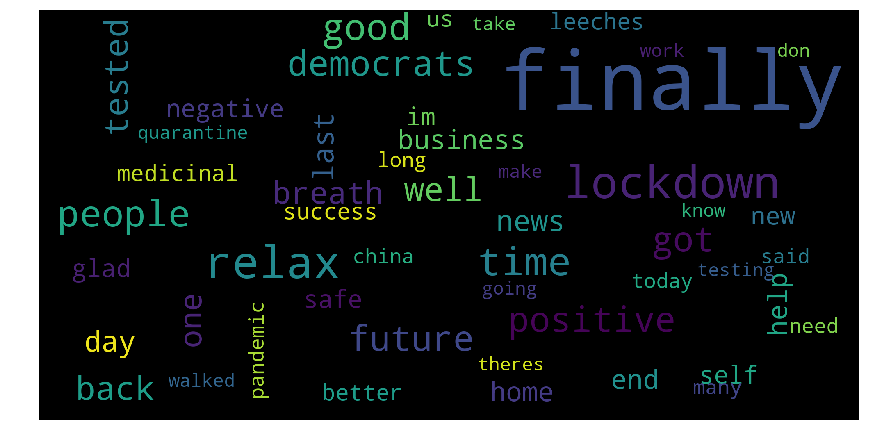

In [163]:
relief_cloud = WordCloud(
    background_color='black',
    stopwords=stopwords,
    max_words=50,
    max_font_size=40, 
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(relief_list))
plt.figure(figsize = (12, 10), facecolor = None)
plt.imshow(relief_cloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('relief_wordcloud.png')
plt.show()